In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
print(sklearn.__version__)

1.18.1
1.0.1
3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
0.22.1


In [3]:
df = pd.read_csv("..//resources//csv//data//biometrics.csv")

In [4]:
df.head()

,TimeStamp,HR,RR,HRV,MicroSiemens,SCR,SCR_MIN,ArousalMean,ValenceMean,ArousalSD,ValenceSD,PhaseName,MatchesSam
0,2020-11-01 21:14:54,72.1,832,0.10,13.25,0,0,0.0,0.0,0.0,0.0,HA_PV,True
1,2020-11-01 21:14:56,78.6,763,28.34,13.25,0,0,0.0,0.0,0.0,0.0,HA_PV,True
2,2020-11-01 21:14:56,75.8,792,0.00,13.25,0,0,0.0,0.0,0.0,0.0,HA_PV,True
3,2020-11-01 21:14:58,71.4,840,0.00,13.25,0,0,0.0,0.0,0.0,0.0,HA_PV,True
4,2020-11-01 21:14:58,74.2,809,4.36,13.25,0,0,0.0,0.0,0.0,0.0,HA_PV,True


In [5]:
df.describe()

,HR,RR,HRV,MicroSiemens,SCR,SCR_MIN,ArousalMean,ValenceMean,ArousalSD,ValenceSD
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000
mean,77.127533,783.393881,10.431033,9.780516,0.164436,2.338432,3.691902,3.258190,1.406755,0.992700
std,6.722177,63.245506,7.252355,2.119985,0.371026,1.967698,2.918476,2.971955,1.052176,0.761395
min,64.000000,602.000000,0.000000,6.810000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.950000,750.000000,4.955000,8.035000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,75.300000,797.000000,8.500000,9.140000,0.000000,2.000000,4.510000,2.490000,1.930000,1.336709
75%,80.000000,822.500000,13.440000,11.435000,0.000000,4.000000,6.173077,6.083333,2.109377,1.570000
max,99.700000,937.000000,31.070000,15.570000,1.000000,8.000000,7.461538,8.100000,2.850000,2.380000


In [6]:
#sns.pairplot(df, height=4, aspect=1);

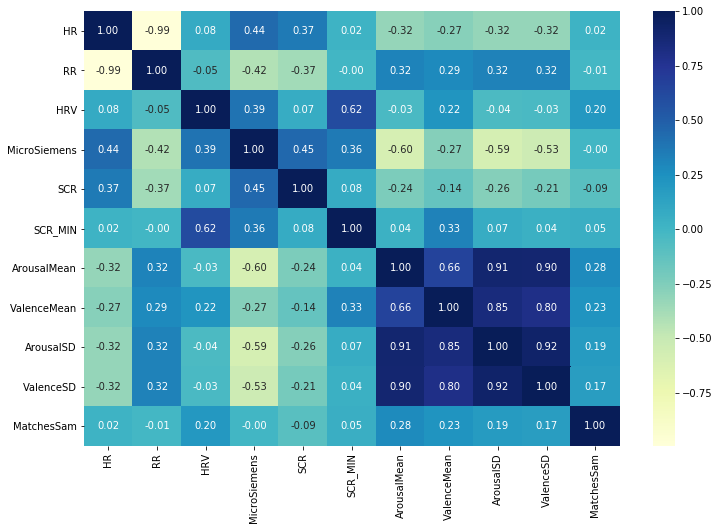

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='YlGnBu')
plt.show()

In [8]:
# Filter outliers (arousal - valence = 0)
filterArousal = df['ArousalMean'] > 0
filtered1 = df[filterArousal]
filterSam = filtered1['MatchesSam'] == True
filtered = filtered1[filterSam]
filtered.head()

,TimeStamp,HR,RR,HRV,MicroSiemens,SCR,SCR_MIN,ArousalMean,ValenceMean,ArousalSD,ValenceSD,PhaseName,MatchesSam
62,2020-11-01 21:15:42,82.2,730,23.02,11.14,0,4,6.07,7.63,2.31,1.41,HA_PV,True
63,2020-11-01 21:15:42,90.2,665,22.11,11.53,0,4,6.07,7.63,2.31,1.41,HA_PV,True
65,2020-11-01 21:15:43,96.8,620,20.62,12.27,1,5,7.31,7.21,1.64,2.26,HA_PV,True
66,2020-11-01 21:15:45,96.8,620,19.91,11.43,0,5,6.68,7.20,1.97,2.35,HA_PV,True
67,2020-11-01 21:15:45,74.9,801,18.88,11.29,0,5,6.68,7.20,1.97,2.35,HA_PV,True


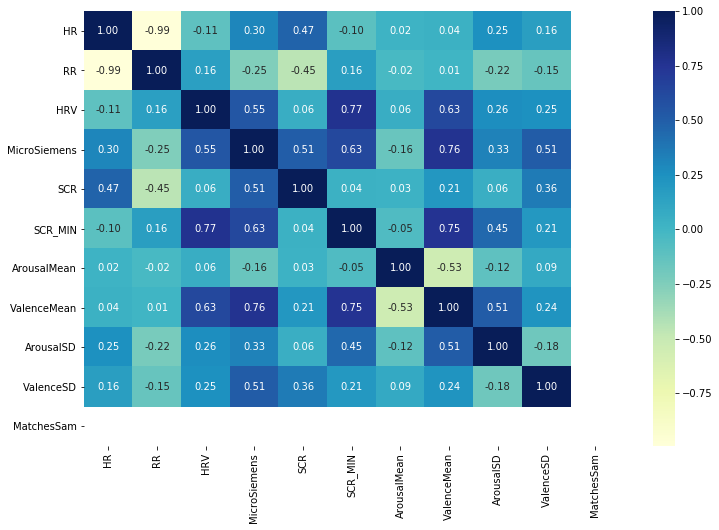

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(filtered.corr(), annot=True, fmt=".2f", cmap='YlGnBu')
plt.show()

In [10]:
X = filtered[['HR', 'RR', 'HRV']].values
y = filtered['ArousalMean'].values
X

array([[ 82.2 , 730.  ,  23.02],
       [ 90.2 , 665.  ,  22.11],
       [ 96.8 , 620.  ,  20.62],
       [ 96.8 , 620.  ,  19.91],
       [ 74.9 , 801.  ,  18.88],
       [ 67.5 , 889.  ,  17.38],
       [ 67.  , 896.  ,  16.35],
       [ 67.  , 895.  ,  16.12],
       [ 66.2 , 907.  ,  16.61],
       [ 67.  , 896.  ,  17.95],
       [ 71.2 , 843.  ,  19.4 ],
       [ 70.5 , 851.  ,  21.12],
       [ 72.7 , 825.  ,  22.73],
       [ 70.3 , 854.  ,  25.61],
       [ 71.5 , 839.  ,  26.55],
       [ 67.6 , 888.  ,  27.27],
       [ 64.7 , 927.  ,  27.85],
       [ 64.2 , 935.  ,  28.06],
       [ 64.  , 937.  ,  28.06],
       [ 68.3 , 879.  ,  28.06],
       [ 67.6 , 888.  ,  28.09],
       [ 68.9 , 871.  ,  28.19],
       [ 69.  , 869.  ,  28.43],
       [ 74.1 , 810.  ,  28.71],
       [ 72.  , 833.  ,  29.06],
       [ 71.6 , 838.  ,  29.45],
       [ 71.3 , 842.  ,  29.85],
       [ 76.2 , 787.  ,  30.25],
       [ 73.3 , 819.  ,  30.65],
       [ 70.9 , 846.  ,  31.07],
       [ 6

In [11]:
X[0]

array([ 82.2 , 730.  ,  23.02])

In [12]:
y

array([6.07    , 6.07    , 7.31    , 6.68    , 6.68    , 6.68    ,
       6.14    , 6.14    , 6.61    , 6.61    , 6.61    , 6.73    ,
       6.73    , 6.35    , 6.28    , 6.28    , 6.28    , 6.84    ,
       6.84    , 7.27    , 7.27    , 7.27    , 6.153846, 6.153846,
       6.153846, 6.153846, 6.153846, 6.153846, 6.153846, 6.153846,
       6.153846, 6.153846, 6.153846, 6.153846, 6.153846, 6.173077,
       6.173077, 6.173077, 6.173077, 6.173077, 6.173077, 6.173077,
       6.173077, 6.173077, 6.173077, 6.173077, 6.173077, 6.173077,
       6.173077, 6.173077, 6.153846, 6.153846, 6.153846, 6.153846,
       6.153846, 6.153846, 6.153846, 6.153846, 6.153846, 6.153846,
       6.153846, 6.153846, 6.153846, 6.153846, 6.153846, 6.153846,
       6.153846, 6.153846, 6.153846, 6.153846, 6.153846, 7.134615,
       7.134615, 7.134615, 7.134615, 7.134615, 7.134615, 6.769231,
       6.769231, 6.769231, 6.769231, 6.769231, 6.769231, 6.769231,
       6.769231, 6.769231, 6.769231, 6.769231, 6.769231, 6.769

# Split data set into train and test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

y_train, y_test

(array([6.07    , 6.07    , 7.31    , 6.68    , 6.68    , 6.68    ,
        6.14    , 6.14    , 6.61    , 6.61    , 6.61    , 6.73    ,
        6.73    , 6.35    , 6.28    , 6.28    , 6.28    , 6.84    ,
        6.84    , 7.27    , 7.27    , 7.27    , 6.153846, 6.153846,
        6.153846, 6.153846, 6.153846, 6.153846, 6.153846, 6.153846,
        6.153846, 6.153846, 6.153846, 6.153846, 6.153846, 6.173077,
        6.173077, 6.173077, 6.173077, 6.173077, 6.173077, 6.173077,
        6.173077, 6.173077, 6.173077, 6.173077, 6.173077, 6.173077,
        6.173077, 6.173077, 6.153846, 6.153846, 6.153846, 6.153846,
        6.153846, 6.153846, 6.153846, 6.153846, 6.153846, 6.153846,
        6.153846, 6.153846, 6.153846, 6.153846, 6.153846, 6.153846,
        6.153846, 6.153846, 6.153846, 6.153846, 6.153846, 7.134615,
        7.134615, 7.134615, 7.134615, 7.134615, 7.134615, 6.769231,
        6.769231, 6.769231, 6.769231, 6.769231, 6.769231, 6.769231,
        6.769231, 6.769231, 6.769231, 6.769231, 

In [15]:
# Para poder usar un clasificador, los datos de la variable target deben ser discretos.
#Los convertimos a True-False (Aroused-NotAroused) con el fin de poder entrear un clasificador binario
y_train_aroused = (y_train > 5)

In [16]:
y_train_aroused

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

# SGDClassifier
[SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) Linear classifiers (SVM, logistic regression) with SGD training.

# Training

In [17]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state = 0)
clf.fit(X_train, y_train_aroused)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

# Prediction

In [18]:
clf.predict(X[50].reshape(1, -1))

array([ True])

In [19]:
X[50]

array([ 74.  , 811.  ,   9.28])

# Performance Measuring

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
cross_val_score(clf, X_train, y_train_aroused, cv=3, scoring='accuracy')

array([0.69444444, 0.68055556, 0.30985915])

# Confusion Matrix

In [22]:
from sklearn.model_selection import cross_val_predict

In [23]:
y_train_pred = cross_val_predict(clf, X_train, y_train_aroused, cv=3)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(y_train_aroused, y_train_pred)

array([[22, 45],
       [49, 99]], dtype=int64)

In [26]:
pd.DataFrame(confusion_matrix(y_train_aroused, y_train_pred),
             columns=pd.MultiIndex.from_product([['Prediction'], ["Negative", "Positive"]]),
             index=pd.MultiIndex.from_product([["Actual"], ["Negative", "Positive"]]))

Prediction         
                  Negative Positive
Actual Negative         22       45
       Positive         49       99

In [27]:
from sklearn.metrics import precision_score, recall_score

In [28]:
precision_score(y_train_aroused, y_train_pred)

0.6875